In [1]:
import os
import numpy as np
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

df = pd.read_csv("Input_Data.csv")
print("Input Data Dimensions : ", df.shape)
  


Input Data Dimensions :  (1306122, 3)


In [4]:
df.head(5)

qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
df = df.drop(['qid'],axis = 1)

In [6]:
df.shape

(1306122, 2)

In [7]:
df_sincere = df.loc[df['target'] == 0]
df_insincere = df.loc[df['target'] == 1]

In [8]:
df_main = df
df_main.shape

(1306122, 2)

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1000,
        height = 1000,#,stopwords = STOPWORDS,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


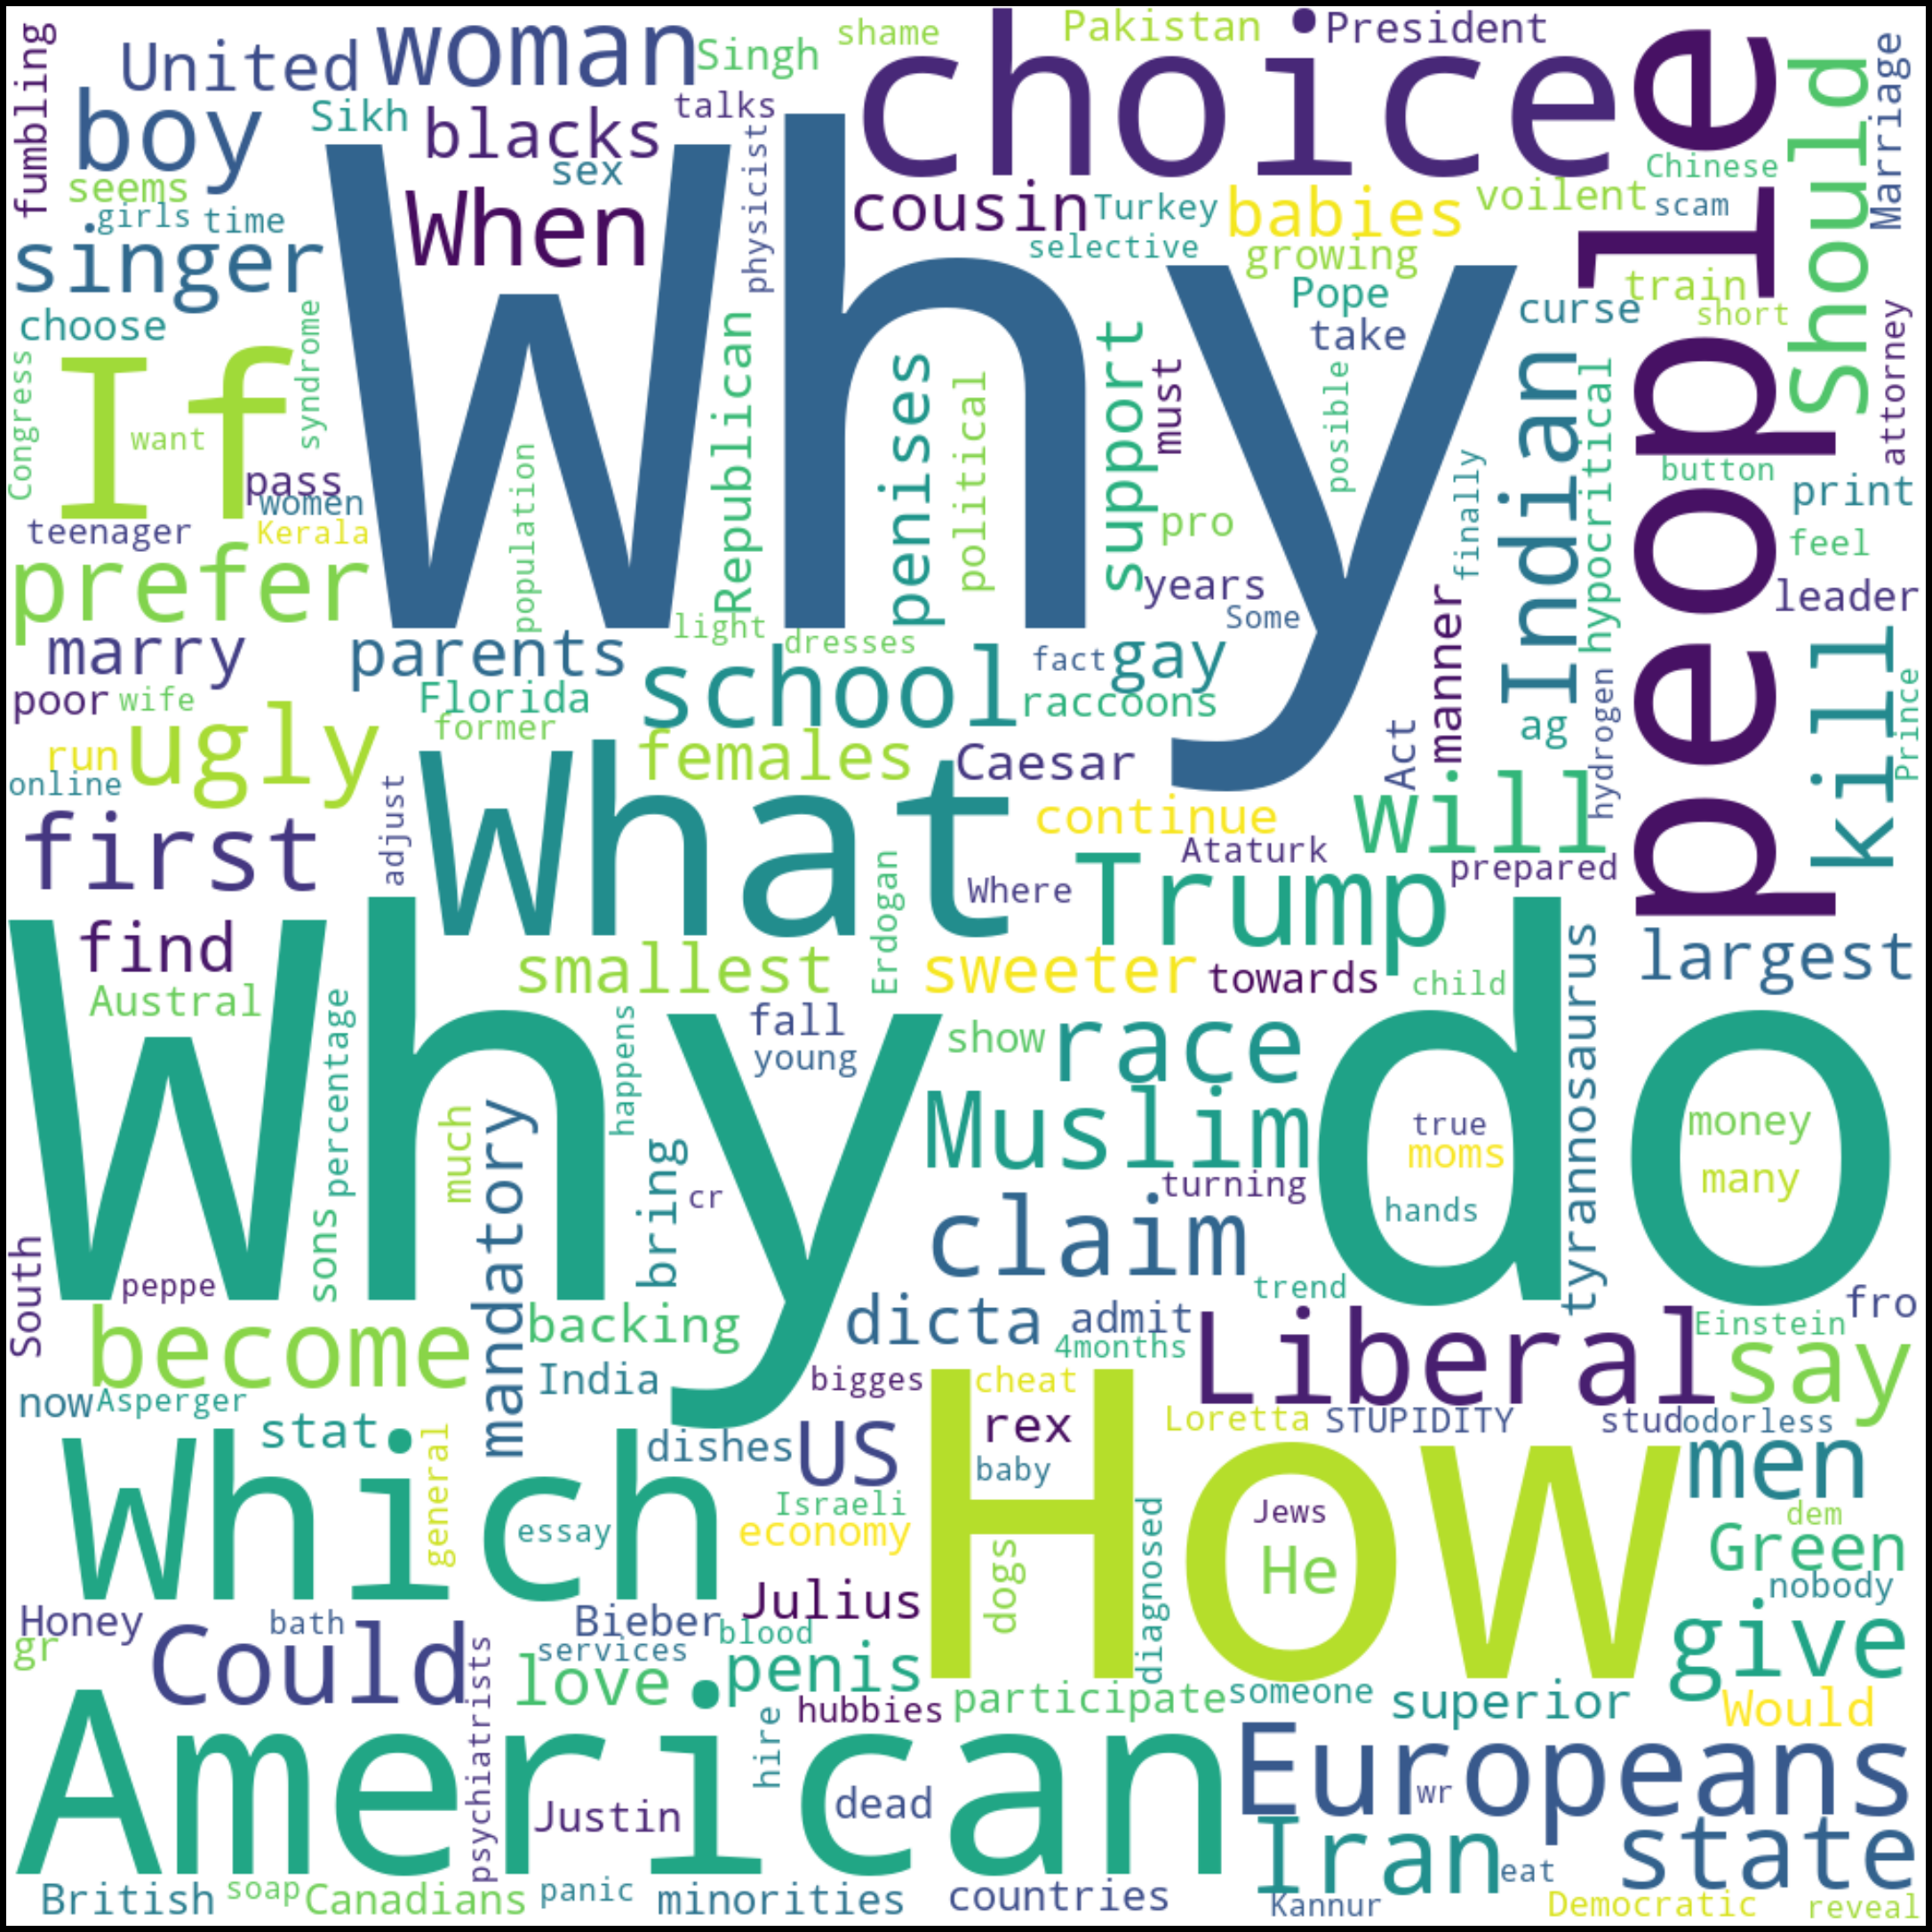

In [10]:
real_data_text = df_insincere.question_text
generate_word_cloud(real_data_text)

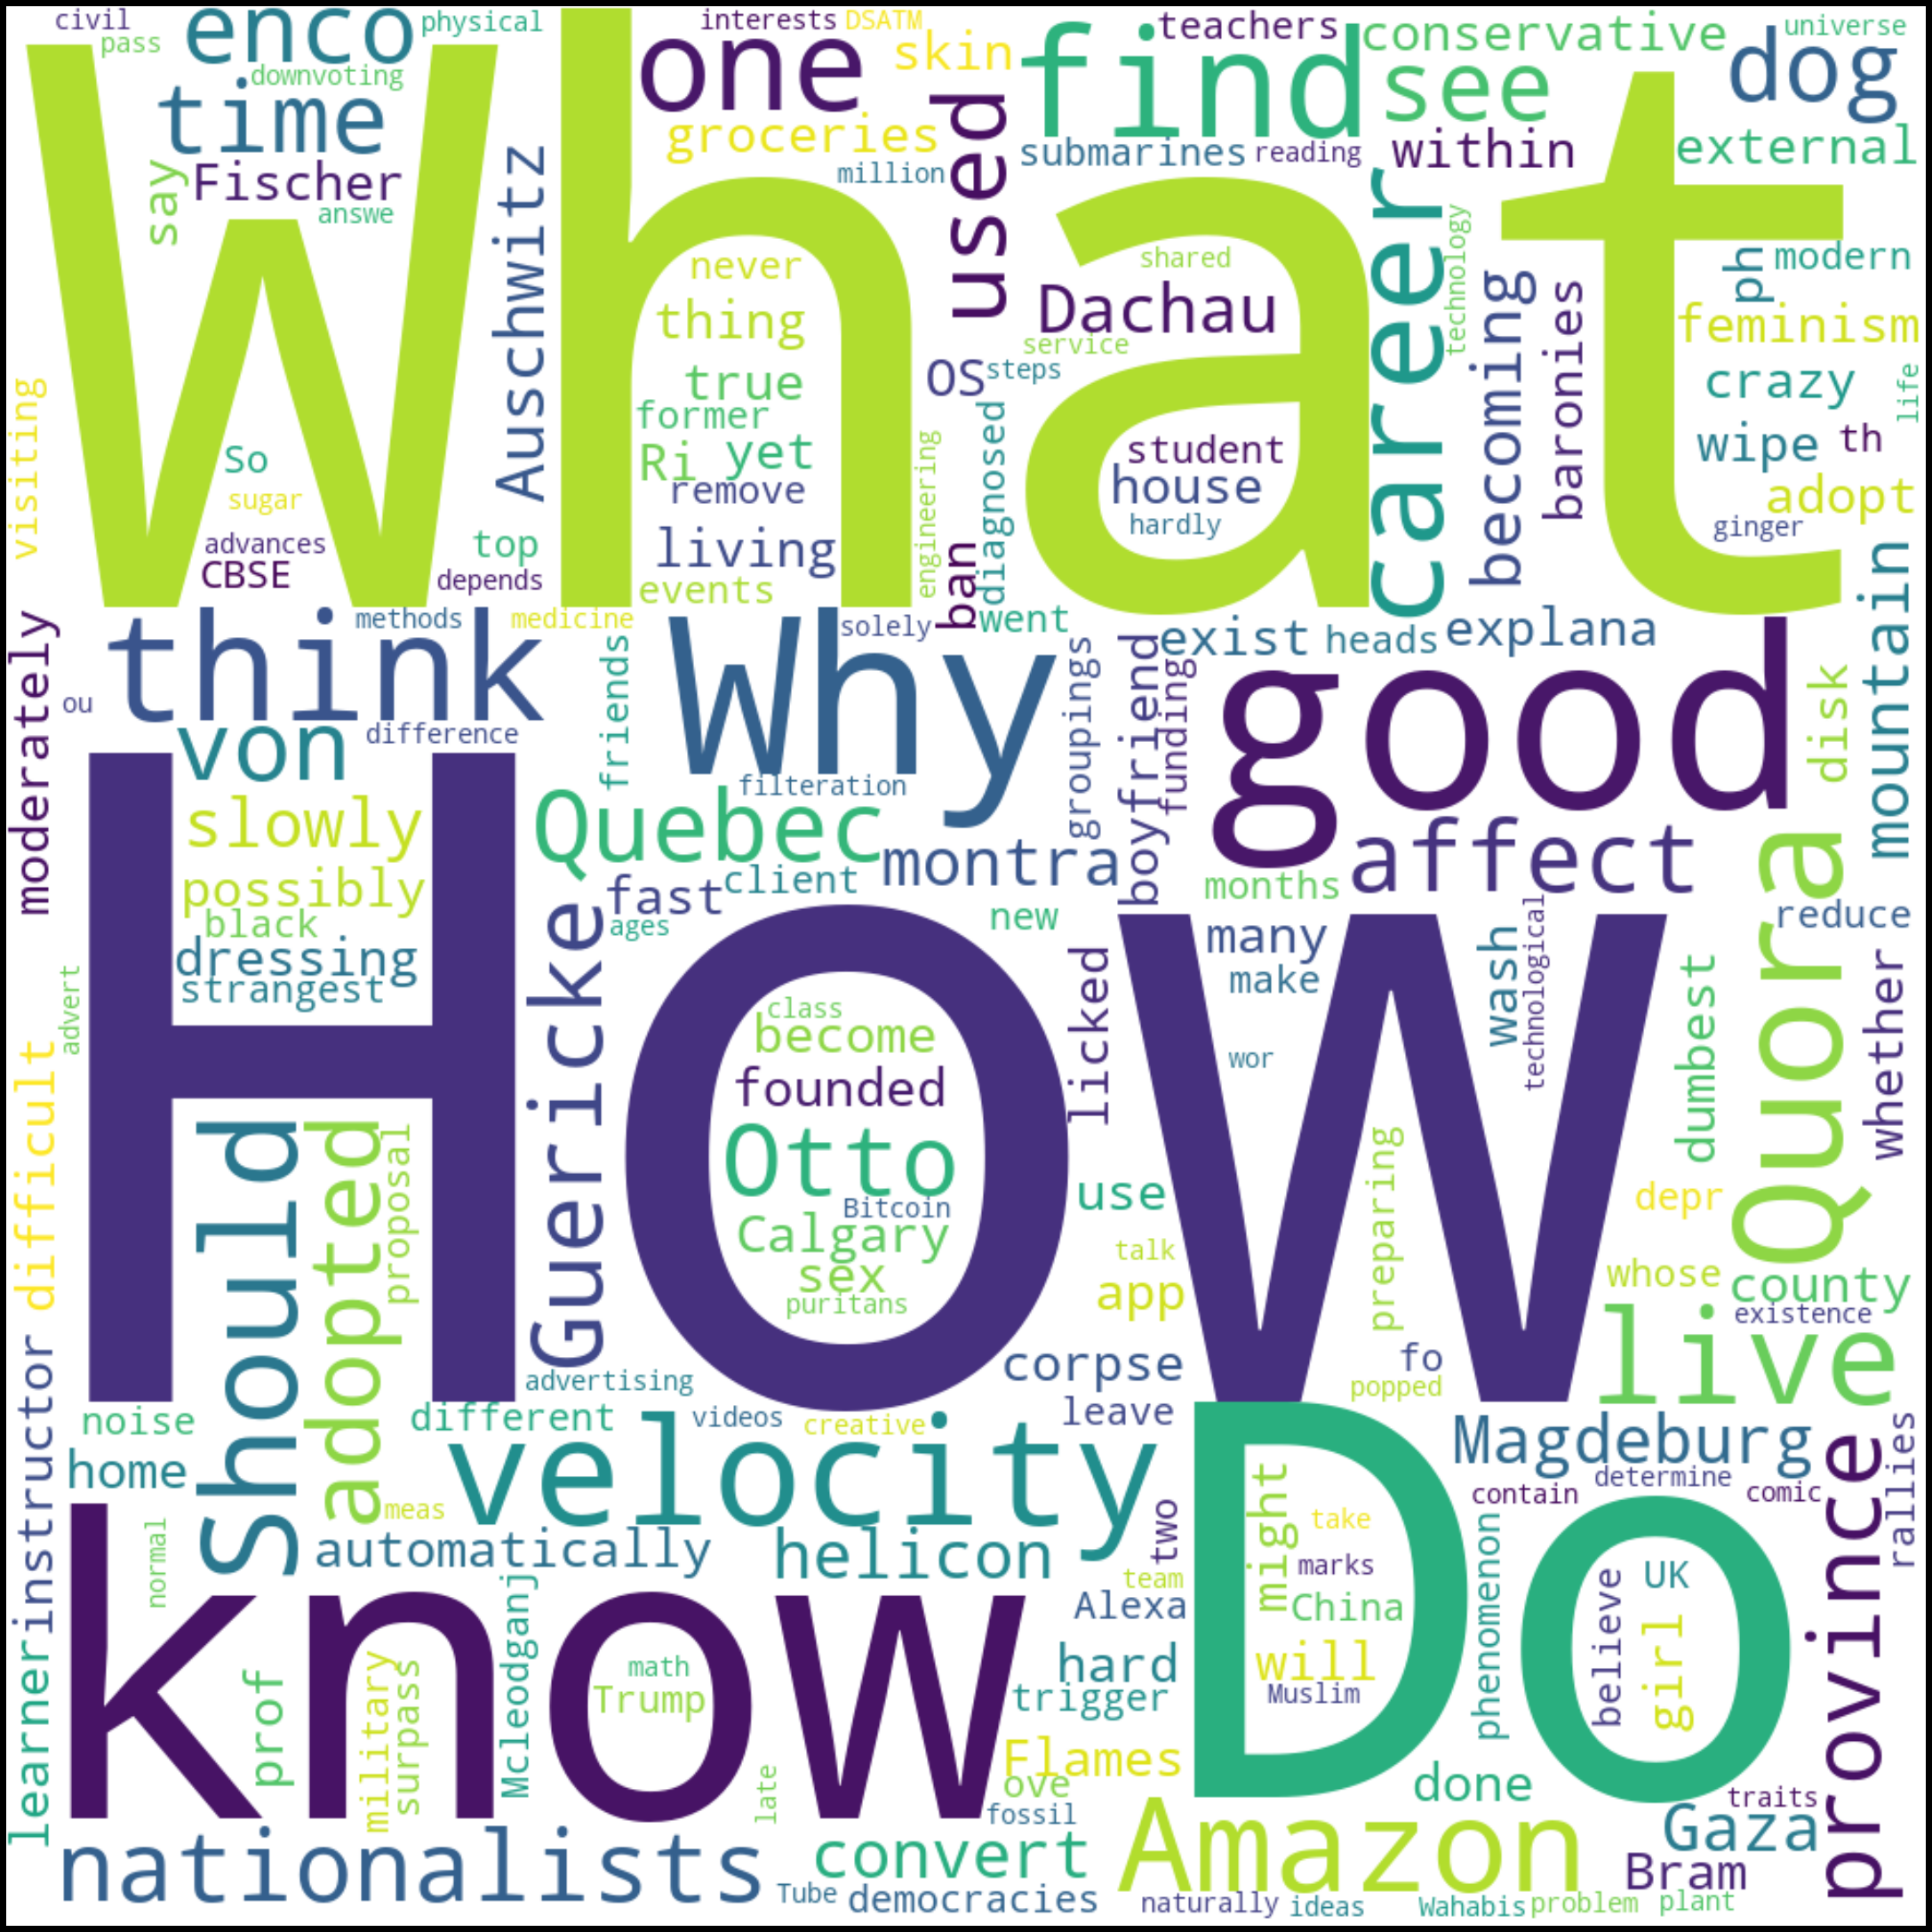

In [11]:
sincere = df_sincere.question_text
generate_word_cloud(sincere)

In [12]:
from plotly import tools
import plotly.offline as py
from plotly import subplots
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [13]:

from collections import defaultdict

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]# if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_sincere["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_insincere["question_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of sincere questions", 
                                          "Frequent words of insincere questions"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1000, width=1000, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

#plt.figure(figsize=(10,16))
#sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
#plt.title("Frequent words for Insincere Questions", fontsize=16)
#plt.show()

In [26]:
freq_dict = defaultdict(int)
for sent in df_sincere["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_insincere["question_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'cyan')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of sincere questions", 
                                          "Frequent bigrams of insincere questions"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

In [27]:
freq_dict = defaultdict(int)
for sent in df_sincere["question_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'purple')


freq_dict = defaultdict(int)
for sent in df_insincere["question_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of sincere questions", 
                                          "Frequent trigrams of insincere questions"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

C:\Users\sbhala\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbhala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import nltk
from nltk.corpus import stopwords
import string

from scipy.sparse import hstack
eng_stopwords = set(stopwords.words("english"))

In [30]:

df_insincere["num_words"] = df_insincere["question_text"].apply(lambda x: len(str(x).split()))
df_sincere["num_words"] = df_sincere["question_text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df_insincere["num_unique_words"] = df_insincere["question_text"].apply(lambda x: len(set(str(x).split())))
df_sincere["num_unique_words"] = df_sincere["question_text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df_insincere["num_chars"] = df_insincere["question_text"].apply(lambda x: len(str(x)))
df_sincere["num_chars"] = df_sincere["question_text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df_insincere["num_stopwords"] = df_insincere["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_sincere["num_stopwords"] = df_sincere["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
df_insincere["num_punctuations"] =df_insincere['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
df_sincere["num_punctuations"] =df_sincere['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
df_insincere["num_words_upper"] = df_insincere["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_sincere["num_words_upper"] = df_sincere["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df_insincere["num_words_title"] = df_insincere["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_sincere["num_words_title"] = df_sincere["question_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df_insincere["mean_word_len"] = df_insincere["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_sincere["mean_word_len"] = df_sincere["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [31]:
print('Total number of words',df_insincere['num_words'].sum())
print('Total number of unique words',df_insincere['num_unique_words'].sum())
print('Total number of characters',df_insincere['num_chars'].sum())
print('Total number of stop words',df_insincere['num_stopwords'].sum())
print('Total number of punctuations ',df_insincere['num_punctuations'].sum())
print('Total number of upper words  ',df_insincere['num_words_upper'].sum())
print('Total number of title ',df_insincere['num_words_title'].sum())
print('Mean word length ',round(df_insincere['mean_word_len'].mean(),2))

Total number of words 1396220
Total number of unique words 1295998
Total number of characters 7924565
Total number of stop words 646547
Total number of punctuations  191512
Total number of upper words   26367
Total number of title  239426
Mean word length  4.77


In [32]:
df_insincere.head()

question_text  target  num_words  \
22   Has the United States become the largest dicta...       1         11   
30   Which babies are more sweeter to their parents...       1         15   
110  If blacks support school choice and mandatory ...       1         15   
114  I am gay boy and I love my cousin (boy). He is...       1         34   
115               Which races have the smallest penis?       1          6   

     num_unique_words  num_chars  num_stopwords  num_punctuations  \
22                  9         67              5                 1   
30                 13         86              6                 2   
110                15        102              6                 2   
114                26        137             20                10   
115                 6         36              3                 1   

     num_words_upper  num_words_title  mean_word_len  
22                 0                3       5.181818  
30                 0                2       4.800000  
110                0                2       5.866667  
114                5                8       3.058824  
115                0                1       5.166667

In [33]:
df_sincere.head()

question_text  target  num_words  \
0  How did Quebec nationalists see their province...       0         13   
1  Do you have an adopted dog, how would you enco...       0         16   
2  Why does velocity affect time? Does velocity a...       0         10   
3  How did Otto von Guericke used the Magdeburg h...       0          9   
4  Can I convert montra helicon D to a mountain b...       0         15   

   num_unique_words  num_chars  num_stopwords  num_punctuations  \
0                13         72              7                 1   
1                15         81              9                 2   
2                 8         67              3                 2   
3                 9         57              3                 1   
4                15         77              8                 1   

   num_words_upper  num_words_title  mean_word_len  
0                0                2       4.615385  
1                0                1       4.125000  
2                0                2       5.800000  
3                0                4       5.444444  
4                2                3       4.200000

In [34]:
df_insincere_master = df_insincere
df_sincere_master = df_sincere

In [35]:
df_insincere['num_words'].max()

64

In [36]:
print('Mean of nummber of words for insincere questions', round(df_insincere['num_words'].mean(),2))

Mean of nummber of words for insincere questions 17.28


In [37]:
print('Mean of nummber of words for sincere questions', round(df_sincere['num_words'].mean(),2))

Mean of nummber of words for sincere questions 12.51


In [38]:
df_sincere['num_words'].max()

134

In [39]:
df_sincere['num_words'].mean()

12.50853333681544

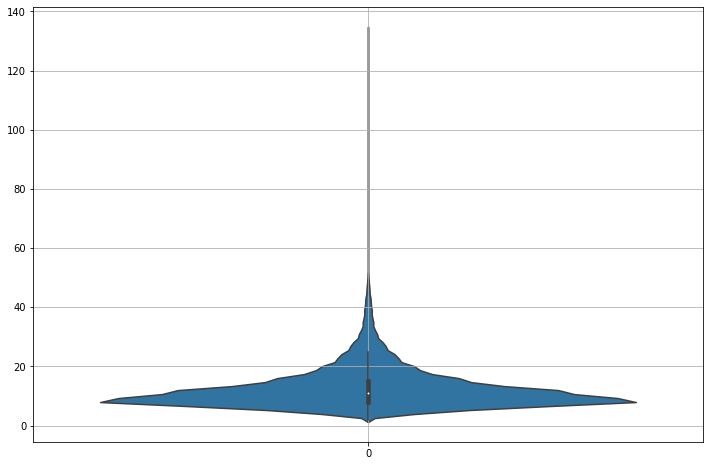

In [40]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df_sincere['num_words'])
plt.grid()
plt.show()

In [41]:
df_insincere['num_words'].describe()

count    80810.000000
mean        17.277812
std          9.568309
min          1.000000
25%         10.000000
50%         15.000000
75%         23.000000
max         64.000000
Name: num_words, dtype: float64

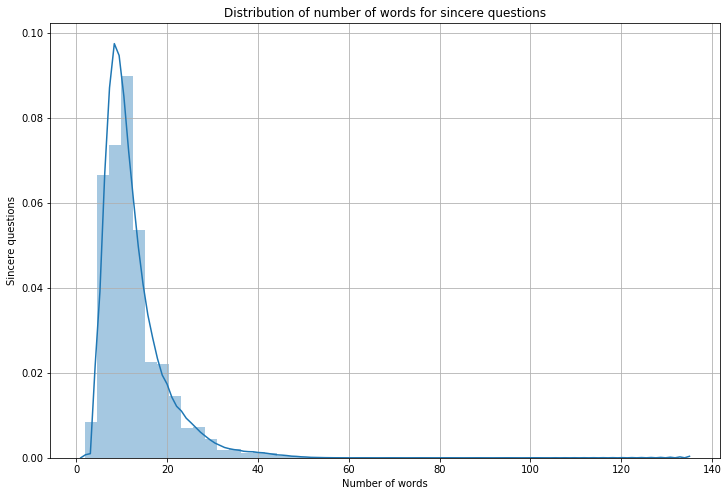

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(df_sincere['num_words'])
plt.xlabel('Number of words')
plt.ylabel('Sincere questions')
plt.title('Distribution of number of words for sincere questions')
plt.grid()
plt.show()

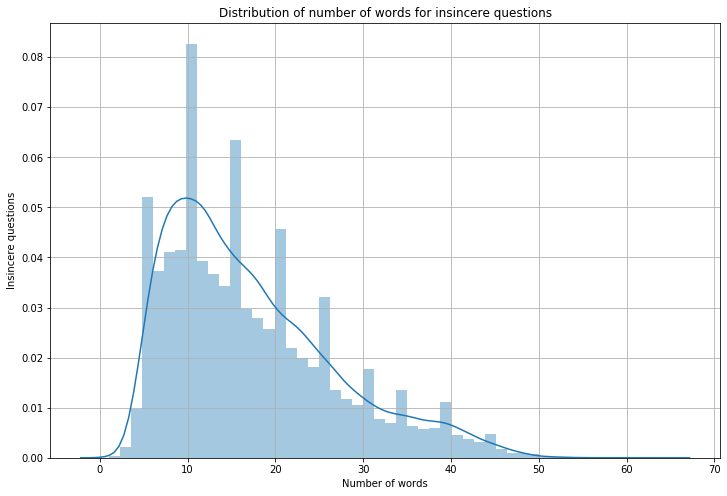

In [43]:
plt.figure(figsize=(12,8))
sns.distplot(df_insincere['num_words'])
plt.xlabel('Number of words')
plt.ylabel('Insincere questions')
plt.title('Distribution of number of words for insincere questions')
plt.grid()
plt.show()

In [44]:
print('Total number of words',df_sincere['num_words'].sum())
print('Total number of unique words',df_sincere['num_unique_words'].sum())
print('Total number of characters',df_sincere['num_chars'].sum())
print('Total number of stop words',df_sincere['num_stopwords'].sum())
print('Total number of punctuations ',df_sincere['num_punctuations'].sum())
print('Total number of upper words  ',df_sincere['num_words_upper'].sum())
print('Total number of title ',df_sincere['num_words_title'].sum())
print('Mean word length ',df_sincere['mean_word_len'].mean())

Total number of words 15326856
Total number of unique words 14554807
Total number of characters 84390617
Total number of stop words 7400922
Total number of punctuations  2089620
Total number of upper words   562246
Total number of title  2531000
Mean word length  4.664509350597183


In [45]:
df_insincere['num_words'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    80810.000000
mean        17.277812
std          9.568309
min          1.000000
25%         10.000000
50%         15.000000
75%         23.000000
90%         31.000000
95%         37.000000
99%         44.000000
max         64.000000
Name: num_words, dtype: float64

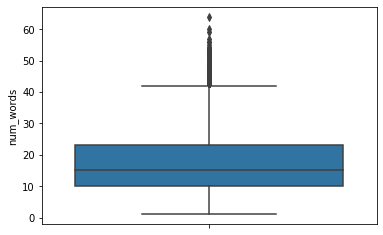

In [46]:
sns.boxplot(df_insincere_master.num_words,orient = "v")
plt.show()

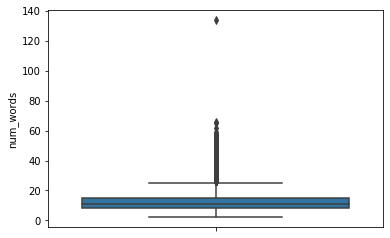

In [47]:
sns.boxplot(df_sincere_master.num_words,orient = "v")
plt.show()

In [48]:
records3 = df_insincere_master[df_insincere_master['num_words'] >= 60]
print(len(records3))

2


In [49]:
records3 = df_sincere_master[df_sincere_master['num_words'] >= 70]
print(len(records3))

1


In [50]:
df_insincere = df_insincere[df_insincere.num_words <= 80]
print(df_insincere.shape)

(80810, 10)


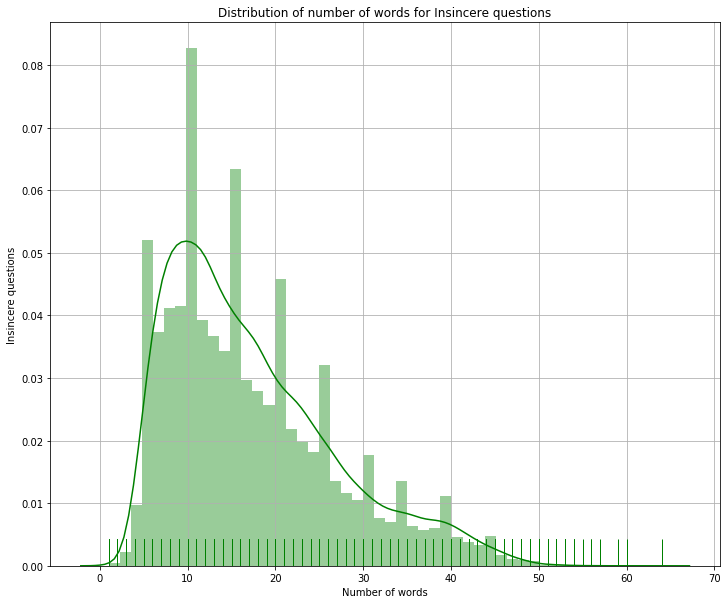

In [51]:
plt.figure(figsize=(12,10))
sns.distplot(df_insincere['num_words'],rug=True,hist=True,color = 'Green')
plt.xlabel('Number of words')
plt.ylabel('Insincere questions')
plt.title('Distribution of number of words for Insincere questions')
plt.grid()
plt.show()

In [52]:
df_sincere['num_words'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    1.225312e+06
mean     1.250853e+01
std      6.750694e+00
min      2.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.500000e+01
90%      2.100000e+01
95%      2.600000e+01
99%      3.800000e+01
max      1.340000e+02
Name: num_words, dtype: float64

In [53]:
records4 = df_sincere[df_sincere['num_words'] >= 60]
print(len(records4))

4


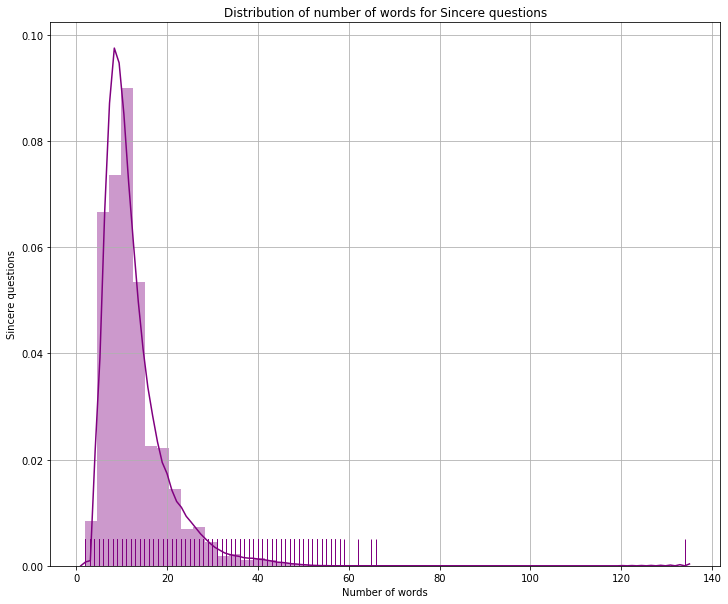

In [54]:
plt.figure(figsize=(12,10))
sns.distplot(df_sincere_master['num_words'],rug=True,hist=True,color = 'purple')
plt.xlabel('Number of words')
plt.ylabel('Sincere questions')
plt.title('Distribution of number of words for Sincere questions')
plt.grid()
plt.show()

In [55]:
df_composite = pd.concat([df_sincere_master,df_insincere_master])

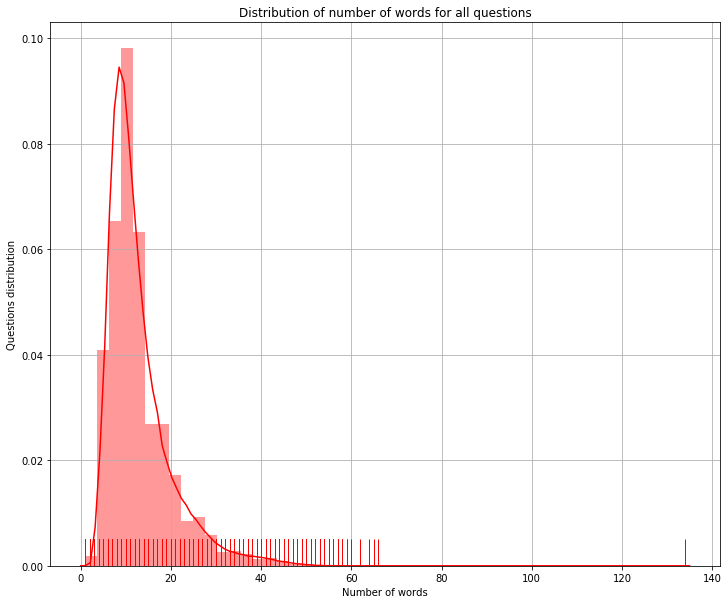

In [56]:
plt.figure(figsize=(12,10))
sns.distplot(df_composite['num_words'],rug=True,hist=True,color = 'red')
plt.xlabel('Number of words')
plt.ylabel('Questions distribution')
plt.title('Distribution of number of words for all questions')
plt.grid()
plt.show()

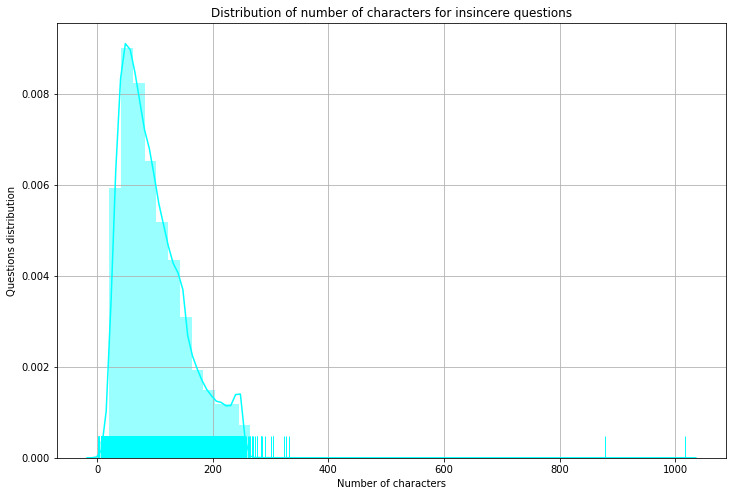

In [57]:
plt.figure(figsize=(12,8))
sns.distplot(df_insincere_master['num_chars'],rug=True,hist=True,color = 'cyan')
plt.xlabel('Number of characters')
plt.ylabel('Questions distribution')
plt.title('Distribution of number of characters for insincere questions')
plt.grid()
plt.show()

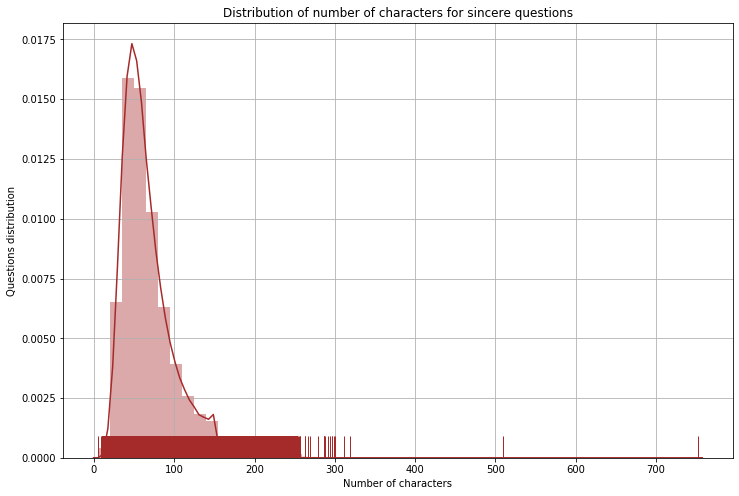

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(df_sincere_master['num_chars'],rug=True,hist=True,color = 'brown')
plt.xlabel('Number of characters')
plt.ylabel('Questions distribution')
plt.title('Distribution of number of characters for sincere questions')
plt.grid()
plt.show()

In [59]:
df_sincere_master['num_chars'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    1.225312e+06
mean     6.887276e+01
std      3.674032e+01
min      5.000000e+00
25%      4.400000e+01
50%      5.900000e+01
75%      8.300000e+01
90%      1.170000e+02
95%      1.430000e+02
99%      2.080000e+02
max      7.520000e+02
Name: num_chars, dtype: float64

In [60]:
df_insincere_master['num_chars'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    80810.000000
mean        98.064163
std         55.186227
min          1.000000
25%         55.000000
50%         86.000000
75%        130.000000
90%        179.000000
95%        216.000000
99%        247.000000
max       1017.000000
Name: num_chars, dtype: float64

In [61]:
df_sincere_master['mean_word_len'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    1.225312e+06
mean     4.664509e+00
std      8.192165e-01
min      1.172414e+00
25%      4.111111e+00
50%      4.583333e+00
75%      5.133333e+00
90%      5.705882e+00
95%      6.100000e+00
99%      7.000000e+00
max      4.900000e+01
Name: mean_word_len, dtype: float64

In [62]:
df_insincere_master['mean_word_len'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    80810.000000
mean         4.769549
std          0.804980
min          1.000000
25%          4.285714
50%          4.724138
75%          5.200000
90%          5.684211
95%          6.000000
99%          6.833333
max         57.666667
Name: mean_word_len, dtype: float64

In [64]:
record6 = df_sincere[df_sincere.mean_word_len >= 8]
print(len(record6))

2408


In [65]:
record7 = df_insincere[df_insincere.mean_word_len >= 8]
print(len(record7))

172


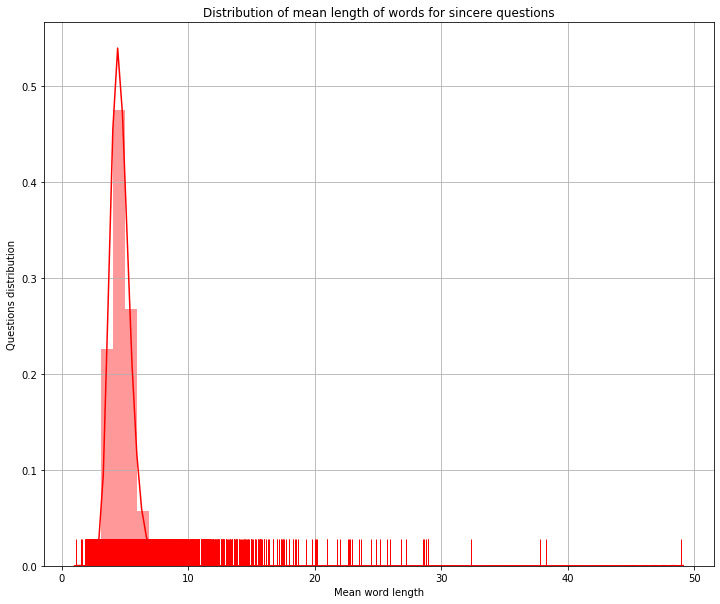

In [66]:
plt.figure(figsize=(12,10))
sns.distplot(df_sincere_master['mean_word_len'],rug=True,hist=True,color = 'red')
plt.xlabel('Mean word length')
plt.ylabel('Questions distribution')
plt.title('Distribution of mean length of words for sincere questions')
plt.grid()
plt.show()

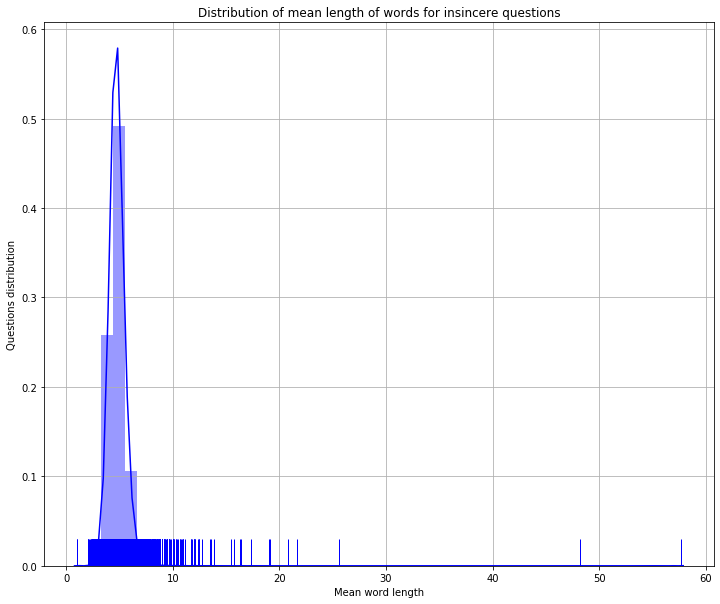

In [67]:
plt.figure(figsize=(12,10))
sns.distplot(df_insincere_master['mean_word_len'],rug=True,hist=True,color='blue')
plt.xlabel('Mean word length')
plt.ylabel('Questions distribution')
plt.title('Distribution of mean length of words for insincere questions')
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

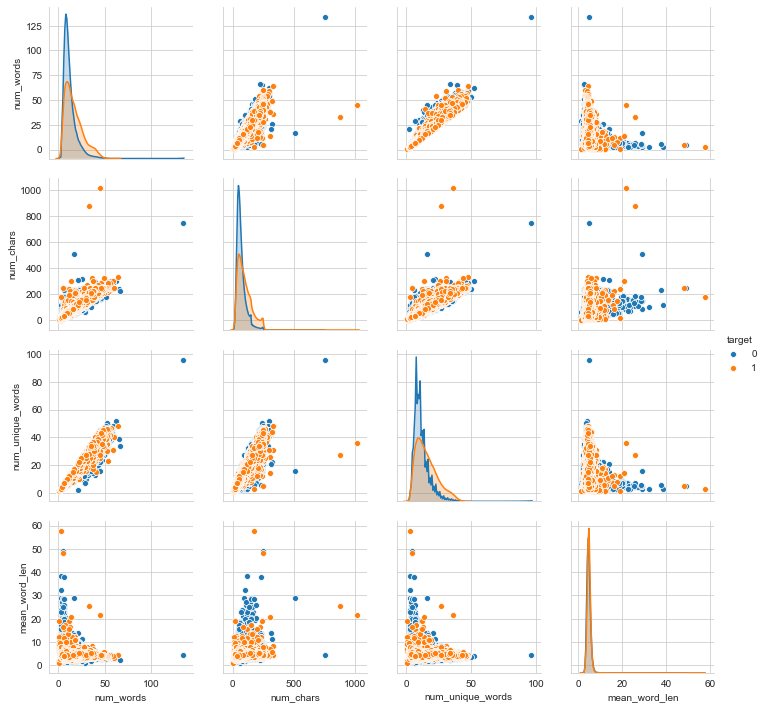

In [68]:
plt.figure()
sns.set_style("whitegrid");
sns.pairplot(df_composite,hue='target',
            x_vars = ['num_words','num_chars','num_unique_words','mean_word_len'],
            y_vars = ['num_words','num_chars','num_unique_words','mean_word_len'])
plt.show()